<a href="https://colab.research.google.com/github/bartlomiejkoszek/data_analysis/blob/main/System_ticketowy_analiza_ilo%C5%9Bci_zg%C5%82osze%C5%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Analiza zgłoszeń z systemu ticketowego
import os
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.


In [ ]:
#Wczytanie DB
df_odis = pd.read_csv('1674812981537.csv', sep = ",")
df_odis

,Id,Numer zgłoszenia SC2,Temat,Dane użytkownika,Poziom,Kategoria,Stan,Data utworzenia,Godzina ostatniej aktualizacji,Podkategoria;
0,20937,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,25/05/2023 02:03 PM,26/05/2023 11:56 AM,Praca;
1,20927,-,Offboard Diagnostic Information System Feedbac...,01350.serwis,Partner serwisowy,ODIS,Zamknięte,25/05/2023 01:35 PM,26/05/2023 11:55 AM,Praca;
2,20920,-,Offboard Diagnostic Information System Feedbac...,00470.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 03:06 PM,24/05/2023 04:07 PM,Praca;
3,20916,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 09:21 AM,24/05/2023 12:52 PM,Praca;
4,20915,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 09:21 AM,24/05/2023 12:54 PM,Praca;
...,...,...,...,...,...,...,...,...,...,...
7618,"2632,-,""ODIS licencja, GEKO, VAS6154"",VagTech ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7619,2631,-,ODIS zakup licencji na 365 dni,Dariusz Kwiatkowski,Warsztat niezależny,erWin,Zamknięte,12/03/2018 02:21 PM,26/04/2018 09:56 AM,Uprawnienia;
7620,2630,IM62511370,Offboard Diagnostic Information System Feedbac...,technik.warszawa,Partner serwisowy,ODIS,Rozwiązane przez SC2,12/03/2018 10:05 AM,09/05/2018 11:23 AM,Praca;
7621,2626,-,Licencja Odis,Hubert Mróz,Partner serwisowy,ODIS,Zamknięte,11/03/2018 09:48 PM,17/04/2018 03:56 PM,Praca;


In [ ]:
# Badanie pustych wartości
sum(df_odis.isnull().sum())
# per wiersz (axis 1)
df_odis.isnull().sum(axis=1)
# per kolumna
df_odis.isnull().sum(axis=0)

Id                                  0
Numer zgłoszenia SC2              259
Temat                             259
Dane użytkownika                  259
Poziom                            259
Kategoria                         259
Stan                              259
Data utworzenia                   259
Godzina ostatniej aktualizacji    259
Podkategoria;                     259
dtype: int64

In [ ]:
#Usuwanie pustych wartości
df_odis = df_odis.dropna()
df_odis

,Id,Numer zgłoszenia SC2,Temat,Dane użytkownika,Poziom,Kategoria,Stan,Data utworzenia,Godzina ostatniej aktualizacji,Podkategoria;
0,20937,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,25/05/2023 02:03 PM,26/05/2023 11:56 AM,Praca;
1,20927,-,Offboard Diagnostic Information System Feedbac...,01350.serwis,Partner serwisowy,ODIS,Zamknięte,25/05/2023 01:35 PM,26/05/2023 11:55 AM,Praca;
2,20920,-,Offboard Diagnostic Information System Feedbac...,00470.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 03:06 PM,24/05/2023 04:07 PM,Praca;
3,20916,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 09:21 AM,24/05/2023 12:52 PM,Praca;
4,20915,-,Offboard Diagnostic Information System Feedbac...,01310.serwis,Partner serwisowy,ODIS,Zamknięte,24/05/2023 09:21 AM,24/05/2023 12:54 PM,Praca;
...,...,...,...,...,...,...,...,...,...,...
7617,2636,-,VAS6160E - problem z ekranem dotykowym,Tomasz Wiśniewski - - VW MROCZKOWSKI,Partner serwisowy,Infrastruktura,Zamknięte,13/03/2018 10:12 AM,26/04/2018 10:20 AM,Tester;
7619,2631,-,ODIS zakup licencji na 365 dni,Dariusz Kwiatkowski,Warsztat niezależny,erWin,Zamknięte,12/03/2018 02:21 PM,26/04/2018 09:56 AM,Uprawnienia;
7620,2630,IM62511370,Offboard Diagnostic Information System Feedbac...,technik.warszawa,Partner serwisowy,ODIS,Rozwiązane przez SC2,12/03/2018 10:05 AM,09/05/2018 11:23 AM,Praca;
7621,2626,-,Licencja Odis,Hubert Mróz,Partner serwisowy,ODIS,Zamknięte,11/03/2018 09:48 PM,17/04/2018 03:56 PM,Praca;


In [ ]:
#Pozostawiono jedynie potrzebne do analizy kolumny
columns = ['Numer zgłoszenia SC2', 'Temat', 'Dane użytkownika', 'Kategoria', 'Stan', 'Godzina ostatniej aktualizacji', 'Podkategoria;']
df_odis.drop(columns, inplace=True, axis=1)
df_odis

<ipython-input-9-23a751faf6d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odis.drop(columns, inplace=True, axis=1)


,Id,Poziom,Data utworzenia
0,20937,Partner serwisowy,25/05/2023 02:03 PM
1,20927,Partner serwisowy,25/05/2023 01:35 PM
2,20920,Partner serwisowy,24/05/2023 03:06 PM
3,20916,Partner serwisowy,24/05/2023 09:21 AM
4,20915,Partner serwisowy,24/05/2023 09:21 AM
...,...,...,...
7617,2636,Partner serwisowy,13/03/2018 10:12 AM
7619,2631,Warsztat niezależny,12/03/2018 02:21 PM
7620,2630,Partner serwisowy,12/03/2018 10:05 AM
7621,2626,Partner serwisowy,11/03/2018 09:48 PM


In [ ]:
#zmiana formatu daty
df_odis['Data utworzenia'] = df_odis['Data utworzenia'].str[:-9]
df_odis

<ipython-input-10-c119547314c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odis['Data utworzenia'] = df_odis['Data utworzenia'].str[:-9]


,Id,Poziom,Data utworzenia
0,20937,Partner serwisowy,25/05/2023
1,20927,Partner serwisowy,25/05/2023
2,20920,Partner serwisowy,24/05/2023
3,20916,Partner serwisowy,24/05/2023
4,20915,Partner serwisowy,24/05/2023
...,...,...,...
7617,2636,Partner serwisowy,13/03/2018
7619,2631,Warsztat niezależny,12/03/2018
7620,2630,Partner serwisowy,12/03/2018
7621,2626,Partner serwisowy,11/03/2018


In [ ]:
#kolejna zmiana formatu - do optymalnego do dalszych funkcji
df_odis['Data utworzenia'] = pd.to_datetime(df_odis['Data utworzenia'], dayfirst=True)
df_odis

<ipython-input-11-45bcee735061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odis['Data utworzenia'] = pd.to_datetime(df_odis['Data utworzenia'], dayfirst=True)


,Id,Poziom,Data utworzenia
0,20937,Partner serwisowy,2023-05-25
1,20927,Partner serwisowy,2023-05-25
2,20920,Partner serwisowy,2023-05-24
3,20916,Partner serwisowy,2023-05-24
4,20915,Partner serwisowy,2023-05-24
...,...,...,...
7617,2636,Partner serwisowy,2018-03-13
7619,2631,Warsztat niezależny,2018-03-12
7620,2630,Partner serwisowy,2018-03-12
7621,2626,Partner serwisowy,2018-03-11


In [ ]:
#Agregacja dwóch poziomów zgłoszeń
df_odis['Poziom'].value_counts()

Partner serwisowy      5391
Warsztat niezależny    1951
Nie dotyczy              22
Name: Poziom, dtype: int64

In [ ]:
#Przygotowanie danych pod agregację miesięczną
df_odis['miesiecznie'] = pd.to_datetime(df_odis['Data utworzenia']).dt.to_period('M')
df_odis.head()

<ipython-input-13-40b46c2fc4c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odis['miesiecznie'] = pd.to_datetime(df_odis['Data utworzenia']).dt.to_period('M')


,Id,Poziom,Data utworzenia,miesiecznie
0,20937,Partner serwisowy,2023-05-25,2023-05
1,20927,Partner serwisowy,2023-05-25,2023-05
2,20920,Partner serwisowy,2023-05-24,2023-05
3,20916,Partner serwisowy,2023-05-24,2023-05
4,20915,Partner serwisowy,2023-05-24,2023-05


In [ ]:
#sortowanie wartości
df_odis = df_odis.sort_values(by = "Data utworzenia", ascending = False)
df_odis.head()

,Id,Poziom,Data utworzenia,miesiecznie
0,20937,Partner serwisowy,2023-05-25,2023-05
1,20927,Partner serwisowy,2023-05-25,2023-05
2,20920,Partner serwisowy,2023-05-24,2023-05
5,20914,Partner serwisowy,2023-05-24,2023-05
3,20916,Partner serwisowy,2023-05-24,2023-05


In [ ]:
df_odis.dtypes

Id                         object
Poziom                     object
Data utworzenia    datetime64[ns]
miesiecznie             period[M]
dtype: object

In [ ]:
#miesięczna ilość zgłoszeń
df_agg = df_odis['miesiecznie'].value_counts().rename_axis('miesiecznie').reset_index(name = 'counts')
df_agg = df_agg.sort_values(by = 'miesiecznie')
df_agg.drop(df_agg.tail(2).index,inplace=True)
df_agg

,miesiecznie,counts
62,2018-03,23
58,2018-04,42
60,2018-05,30
55,2018-06,52
57,2018-07,43
...,...,...
9,2022-11,165
5,2022-12,174
28,2023-01,131
18,2023-02,149


In [ ]:
df_agg.dtypes

miesiecznie    period[M]
counts             int64
dtype: object

In [ ]:
df_agg_plt = df_agg
df_agg_plt['miesiecznie'] = df_agg.values.astype('datetime64[M]')

<ipython-input-19-f3c5425949f4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(x=df_agg_plt["miesiecznie"], y=df_agg_plt["counts"], ci = None, )


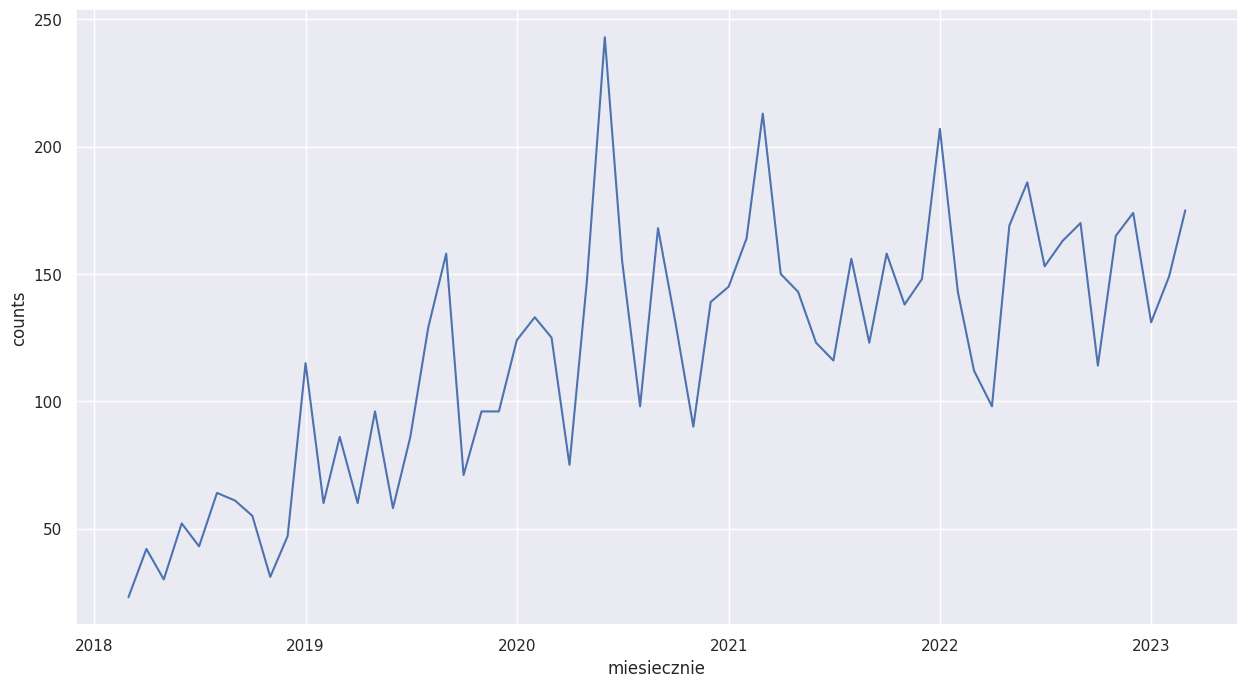

In [ ]:
fig = sns.lineplot(x=df_agg_plt["miesiecznie"], y=df_agg_plt["counts"], ci = None, )
plt.gcf().set_size_inches(15, 8)
#06.2020 -> GeKo na PAS

In [ ]:
#miesięczna ilość zgłoszeń ze stacji niezależnych
df_wn = df_odis[df_odis["Poziom"] == "Warsztat niezależny"].reset_index()
df_wn.head()

,index,Id,Poziom,Data utworzenia,miesiecznie
0,25,20720,Warsztat niezależny,2023-05-03,2023-05
1,26,20712,Warsztat niezależny,2023-05-02,2023-05
2,32,20676,Warsztat niezależny,2023-04-26,2023-04
3,34,20665,Warsztat niezależny,2023-04-25,2023-04
4,37,20624,Warsztat niezależny,2023-04-20,2023-04


In [ ]:
df_agg1 = df_wn['miesiecznie'].value_counts().rename_axis('miesiecznie').reset_index(name = 'counts')
df_agg1 = df_agg1.sort_values(by = 'miesiecznie')
df_agg1.drop(df_agg1.tail(2).index,inplace=True)
df_agg1

,miesiecznie,counts
60,2018-03,8
59,2018-04,10
61,2018-05,4
56,2018-06,14
57,2018-07,13
...,...,...
9,2022-11,47
16,2022-12,42
6,2023-01,50
25,2023-02,34


In [ ]:
df_agg1_plt = df_agg1
df_agg1_plt['miesiecznie'] = df_agg1.values.astype('datetime64[M]')

<ipython-input-23-79ca2a9ffcfb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(x=df_agg1_plt["miesiecznie"], y=df_agg1_plt["counts"], ci = None, )


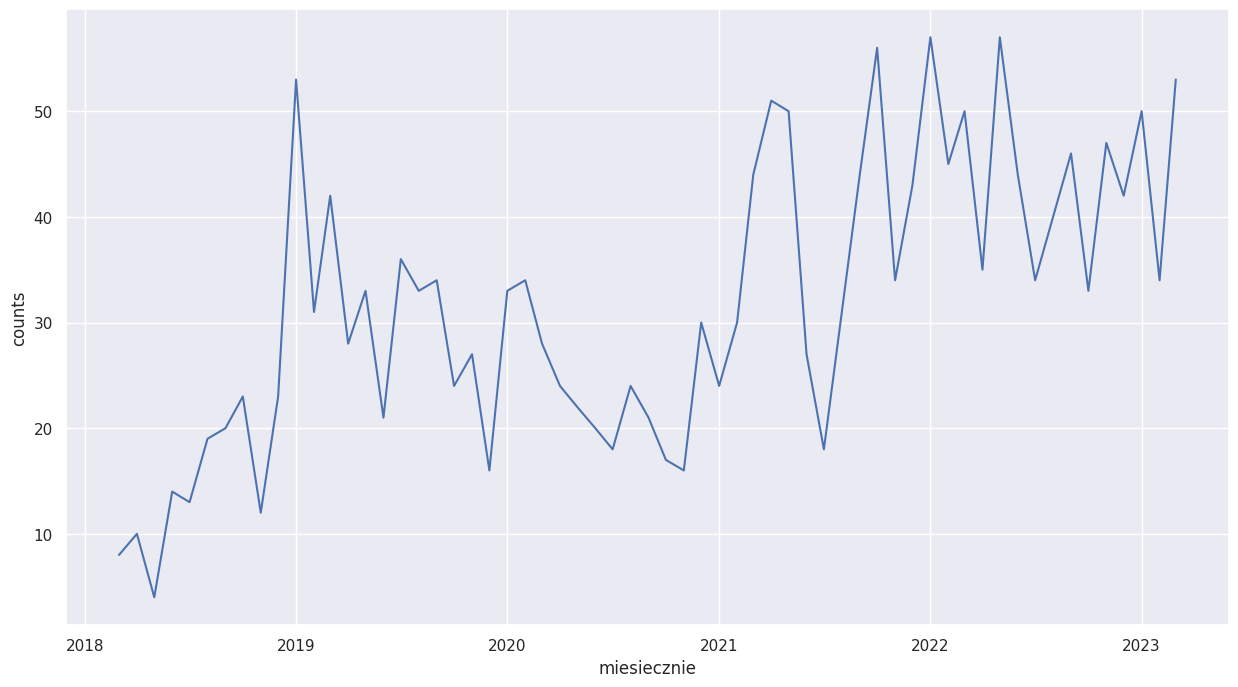

In [ ]:
fig = sns.lineplot(x=df_agg1_plt["miesiecznie"], y=df_agg1_plt["counts"], ci = None, )
plt.gcf().set_size_inches(15, 8)

In [ ]:
#miesięczna ilość zgłoszeń ze stacji autoryzowanych
df_ps = df_odis[df_odis["Poziom"] == "Partner serwisowy"].reset_index()
df_ps.head()

,index,Id,Poziom,Data utworzenia,miesiecznie
0,0,20937,Partner serwisowy,2023-05-25,2023-05
1,1,20927,Partner serwisowy,2023-05-25,2023-05
2,2,20920,Partner serwisowy,2023-05-24,2023-05
3,5,20914,Partner serwisowy,2023-05-24,2023-05
4,3,20916,Partner serwisowy,2023-05-24,2023-05


In [ ]:
df_agg2 = df_ps['miesiecznie'].value_counts().rename_axis('miesiecznie').reset_index(name = 'counts')
df_agg2 = df_agg2.sort_values(by = 'miesiecznie')
df_agg2.drop(df_agg2.tail(2).index,inplace=True)
df_agg2

,miesiecznie,counts
62,2018-03,15
54,2018-04,32
58,2018-05,26
51,2018-06,38
56,2018-07,30
...,...,...
16,2022-11,118
6,2022-12,131
34,2023-01,80
17,2023-02,114


In [ ]:
df_agg2_plt = df_agg2
df_agg2_plt['miesiecznie'] = df_agg2.values.astype('datetime64[M]')

<ipython-input-27-774e03c4971e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(x=df_agg1_plt["miesiecznie"], y=df_agg2_plt["counts"], ci = None, )


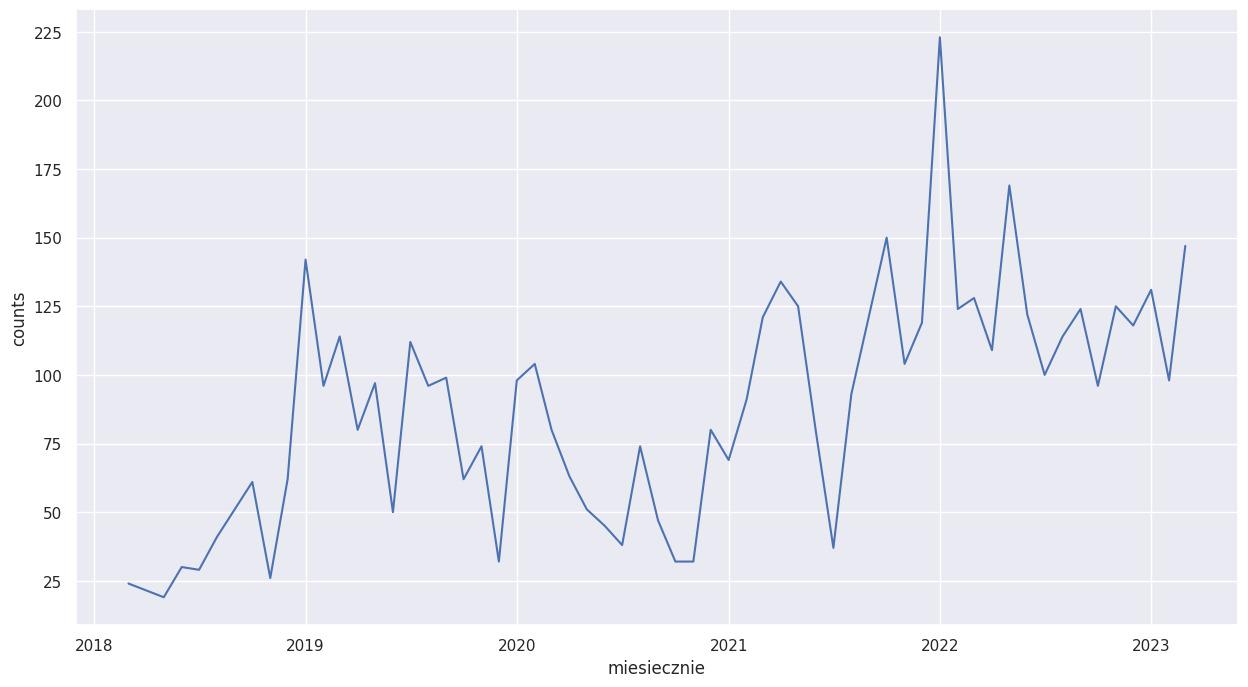

In [ ]:
fig = sns.lineplot(x=df_agg1_plt["miesiecznie"], y=df_agg2_plt["counts"], ci = None, )
plt.gcf().set_size_inches(15, 8)

In [ ]:
#Porównanie ilości zgłoszeń z obu kategorii
df_agg.reset_index(drop=True, inplace=True)
df_agg1.reset_index(drop=True, inplace=True)
df_agg2.reset_index(drop=True, inplace=True)

df_agg_sum = df_agg
df_agg_sum['counts_wn'] = df_agg1['counts']
df_agg_sum['counts_ps'] = df_agg2['counts']
df_agg_sum

,miesiecznie,counts,counts_wn,counts_ps
0,2018-03-01,23,8,15
1,2018-04-01,42,10,32
2,2018-05-01,30,4,26
3,2018-06-01,52,14,38
4,2018-07-01,43,13,30
...,...,...,...,...
56,2022-11-01,165,47,118
57,2022-12-01,174,42,131
58,2023-01-01,131,50,80
59,2023-02-01,149,34,114


In [ ]:
df_agg_sum.rename(columns={"counts": "Number of tickets received monthly"}, inplace=True)
df_agg_sum.rename(columns={"miesiecznie": "Date"}, inplace=True)
df_agg_sum.head

<bound method NDFrame.head of          Date  Number of tickets received monthly  counts_wn  counts_ps
0  2018-03-01                                  23          8         15
1  2018-04-01                                  42         10         32
2  2018-05-01                                  30          4         26
3  2018-06-01                                  52         14         38
4  2018-07-01                                  43         13         30
..        ...                                 ...        ...        ...
56 2022-11-01                                 165         47        118
57 2022-12-01                                 174         42        131
58 2023-01-01                                 131         50         80
59 2023-02-01                                 149         34        114
60 2023-03-01                                 175         53        122

[61 rows x 4 columns]>

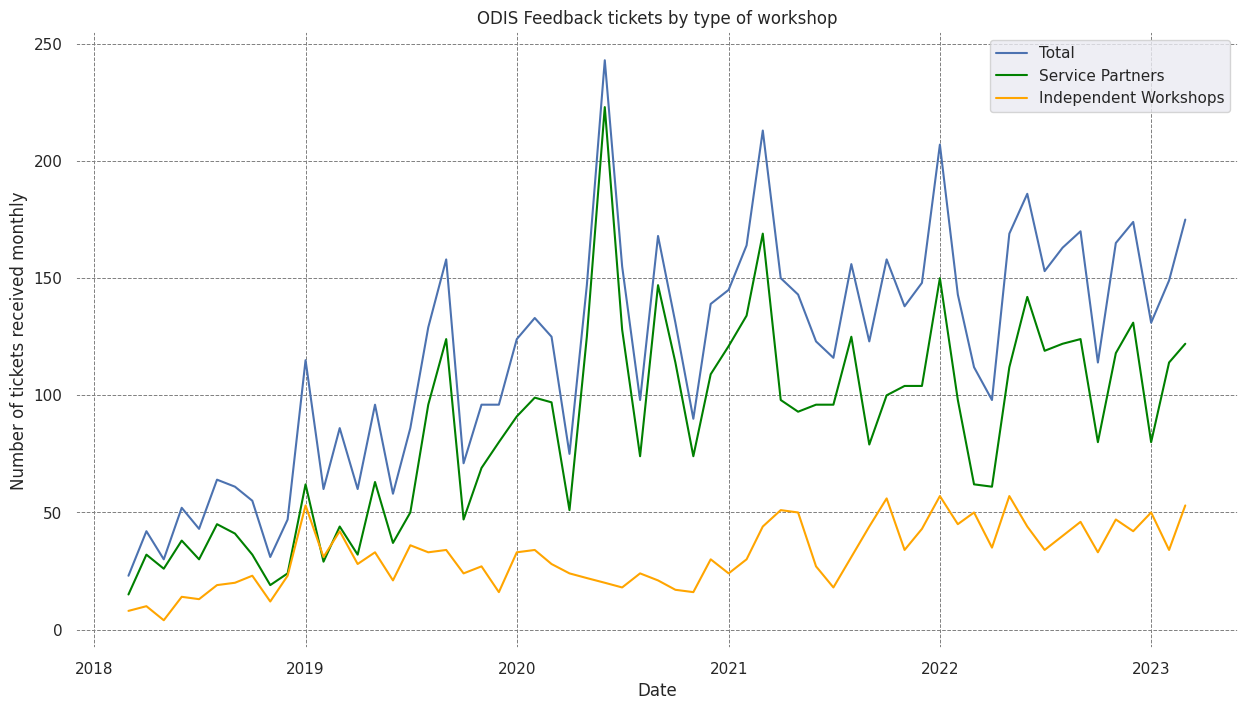

In [ ]:
plt.gcf().set_size_inches(15, 8)
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='--', linewidth=0.7)
sns.lineplot(data=df_agg_sum, x='Date', y='Number of tickets received monthly', label='Total')
sns.lineplot(data=df_agg_sum, x='Date', y='counts_ps', color='green', label='Service Partners')
sns.lineplot(data=df_agg_sum, x='Date', y='counts_wn', color='orange', label='Independent Workshops')
plt.legend()
plt.title('ODIS Feedback tickets by type of workshop')
plt.savefig('plot3.jpg', format='jpg', bbox_inches='tight')
plt.show()


https://stackoverflow.com/questions/58991151/annotate-markers-values-on-seaborn-line-plot-sns